In [1]:
from imports import *
from integrate_results import *
from matplotlib.colors import rgb2hex
from scipy.ndimage.filters import gaussian_filter as gfilt
%matplotlib inline


Bad key "xtick.labeltop" on line 358 in
/Users/ryancloutier/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## get data

In [2]:
# get MCMC results
samples = fits.open('output_data/3planets_TOI175_H113_HalphaGP_samplesv2')[0].data
hc, kc, hd, kd, hb, kb =  samples[:,np.array([9,10,14,15,19,20])].T
eccsampb = hb*hb + kb*kb
eccsampc = hc*hc + kc*kc
eccsampd = hd*hd + kd*kd

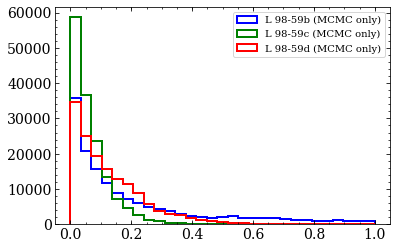

In [3]:
bins = np.linspace(0,1,30)
_=plt.hist(eccsampb, bins=bins, histtype='step', lw=2, label='L 98-59b (MCMC only)')
_=plt.hist(eccsampc, bins=bins, histtype='step', lw=2, label='L 98-59c (MCMC only)')
_=plt.hist(eccsampd, bins=bins, histtype='step', lw=2, label='L 98-59d (MCMC only)')
plt.legend(loc='upper right')

In [4]:
# get stability constraints as functions of each planet's eccentricity
self = loadpickle('pickles_uncorr_0d3ecc_lin_toi175/integrate_results')

## resample eccentricity posteriors to derive eccentricity upper limits for the results table

In [5]:
# resample the eccentricity posteriors based on stability fractions
Ntrials, ecc_binwidth = samples.shape[0]*10, .01 
eccsampb_v2 = np.zeros(0)
eccsampc_v2 = np.zeros(0)
eccsampd_v2 = np.zeros(0)
for i in range(int(Ntrials)):
    
    if i%1e4 == 0:
        print float(i) / Ntrials
        print 'sizes:', eccsampb_v2.size, eccsampc_v2.size, eccsampd_v2.size
    
    # resample e_b
    eb = np.random.choice(eccsampb)
    g = (self.ecc0[:,0] >= eb-ecc_binwidth) & (self.ecc0[:,0] <= eb+ecc_binwidth)
    stabfrac = self.stable[g].sum() / float(self.stable[g].size)
    if np.random.rand() <= stabfrac:
        eccsampb_v2 = np.append(eccsampb_v2, eb)
        
    # resample e_c
    ec = np.random.choice(eccsampc)
    g = (self.ecc0[:,1] >= ec-ecc_binwidth) & (self.ecc0[:,1] <= ec+ecc_binwidth)
    stabfrac = self.stable[g].sum() / float(self.stable[g].size)
    if np.random.rand() <= stabfrac:
        eccsampc_v2 = np.append(eccsampc_v2, ec)
        
    # resample e_d
    ed = np.random.choice(eccsampd)
    g = (self.ecc0[:,2] >= ed-ecc_binwidth) & (self.ecc0[:,2] <= ed+ecc_binwidth)
    stabfrac = self.stable[g].sum() / float(self.stable[g].size)
    if np.random.rand() <= stabfrac:
        eccsampd_v2 = np.append(eccsampd_v2, ed)

0.0
sizes: 0 0 0


/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


0.00666666666667
sizes: 403 1054 576
0.0133333333333
sizes: 813 2031 1172
0.02
sizes: 1198 3029 1722
0.0266666666667
sizes: 1609 4001 2320
0.0333333333333
sizes: 2013 5048 2868
0.04
sizes: 2384 6054 3405
0.0466666666667
sizes: 2799 7051 3965
0.0533333333333
sizes: 3209 8009 4549
0.06
sizes: 3594 9019 5128
0.0666666666667
sizes: 3992 9992 5690
0.0733333333333
sizes: 4392 10973 6276
0.08
sizes: 4823 11982 6861
0.0866666666667
sizes: 5222 13000 7446
0.0933333333333
sizes: 5624 13966 8016
0.1
sizes: 6007 14976 8577
0.106666666667
sizes: 6430 15966 9187
0.113333333333
sizes: 6813 16950 9782
0.12
sizes: 7216 17918 10364
0.126666666667
sizes: 7606 18910 10924
0.133333333333
sizes: 7985 19938 11487
0.14
sizes: 8384 20913 12068
0.146666666667
sizes: 8749 21892 12667
0.153333333333
sizes: 9133 22836 13239
0.16
sizes: 9506 23855 13809
0.166666666667
sizes: 9883 24820 14375
0.173333333333
sizes: 10319 25831 14994
0.18
sizes: 10730 26847 15534
0.186666666667
sizes: 11148 27836 16089
0.193333333333


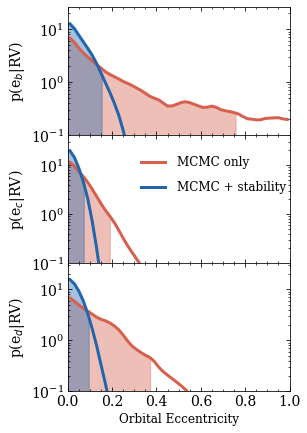

In [11]:
def plot_post(ax, eccsamp, bins, label, col):
    y, xedges = np.histogram(eccsamp, bins=bins, density=True)
    x, y = xedges[:-1]+np.diff(xedges)[0]/2, gfilt(y,1)
    ax.plot(x, y, '-', c=col, lw=lw, label=label)
    fint = interp1d(x, y)
    xm = np.linspace(x[0],np.percentile(eccsamp,95),100)
    ax.fill_between(np.append(0,xm), np.zeros(xm.size+1), np.append(y[0],fint(xm)), color=col, alpha=.4)
    

# plot posteriors
#cols = [rgb2hex(plt.get_cmap('hot')(int(f*255))[:3]) for f in [.1,.5]]
cols = ['#d6604d','#2166ac','#053061','#4393c3','#f4a582','#92c5de','#67001f']
lw=3
bins = np.arange(0,1.01,.02)
#bins = np.logspace(-3,0,40)

fig = plt.figure(figsize=(4,6))
ax1 = fig.add_subplot(311)
plot_post(ax1, eccsampb, bins, 'MCMC only', cols[0])
plot_post(ax1, eccsampb_v2, bins, 'MCMC + stability criteria', cols[1])
ax1.set_ylabel('p(e$_b$|RV)', fontsize=14)
ax1.set_ylim((1e-1,ax1.get_ylim()[1]*2)), ax1.set_xlim((0,1))
#ax1.legend(loc='upper right', frameon=False, fontsize=12)
ax1.set_yscale('log')
ax1.set_xticklabels('')

ax2 = fig.add_subplot(312)
plot_post(ax2, eccsampc, bins, 'MCMC only', cols[0])
plot_post(ax2, eccsampc_v2, bins, 'MCMC + stability', cols[1])
ax2.set_ylabel('p(e$_c$|RV)', fontsize=14)
ax2.set_ylim((1e-1,ax2.get_ylim()[1]*2)), ax2.set_xlim((0,1))
ax2.legend(bbox_to_anchor=(.28,.92), frameon=False, fontsize=12, handletextpad=1, labelspacing=1)
ax2.set_yscale('log')
ax2.set_xticklabels('')

ax3 = fig.add_subplot(313)
plot_post(ax3, eccsampd, bins, 'MCMC only', cols[0])
plot_post(ax3, eccsampd_v2, bins, 'MCMC + stability', cols[1])
ax3.set_ylabel('p(e$_d$|RV)', fontsize=14)
ax3.set_ylim((1e-1,ax3.get_ylim()[1]*2)), ax3.set_xlim((0,1))
ax3.set_xlabel('Orbital Eccentricity', fontsize=12)
ax3.set_yscale('log')

fig.subplots_adjust(hspace=0, right=.96, left=.19, bottom=.09, top=.98)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/eccpost.png')

In [9]:
print np.percentile(eccsampb, 95), np.percentile(eccsampb_v2, 95)
print np.percentile(eccsampc, 95), np.percentile(eccsampc_v2, 95)
print np.percentile(eccsampd, 95), np.percentile(eccsampd_v2, 95)

0.7589742576391667 0.15513318289252054
0.1918684172387148 0.07458954089551693
0.37350076999757537 0.09681299927623321


## get stability maps versus planet eccentricities

In [8]:
# get snp.linspace map versus planet b and c
eccbins = np.linspace(0,.3,20)
stabfrac_bc = np.zeros((eccbins.size-1, eccbins.size-1))
for i in range(stabfrac_bc.shape[0]):
    for j in range(stabfrac_bc.shape[0]):
        g = (self.ecc0[:,0] >= eccbins[i]) & (self.ecc0[:,0] <= eccbins[i+1]) & \
            (self.ecc0[:,1] >= eccbins[j]) & (self.ecc0[:,1] <= eccbins[j+1])
        stabfrac_bc[i,j] = self.stable[g].sum() / float(self.stable[g].size)
        
        
# get stability map versus planet b and d
stabfrac_bd = np.zeros((eccbins.size-1, eccbins.size-1))
for i in range(stabfrac_bd.shape[0]):
    for j in range(stabfrac_bd.shape[0]):
        g = (self.ecc0[:,0] >= eccbins[i]) & (self.ecc0[:,0] <= eccbins[i+1]) & \
            (self.ecc0[:,2] >= eccbins[j]) & (self.ecc0[:,2] <= eccbins[j+1])
        stabfrac_bd[i,j] = self.stable[g].sum() / float(self.stable[g].size)
        
        
# get stability map versus planet c and d
stabfrac_cd = np.zeros((eccbins.size-1, eccbins.size-1))
for i in range(stabfrac_cd.shape[0]):
    for j in range(stabfrac_cd.shape[0]):
        g = (self.ecc0[:,1] >= eccbins[i]) & (self.ecc0[:,1] <= eccbins[i+1]) & \
            (self.ecc0[:,2] >= eccbins[j]) & (self.ecc0[:,2] <= eccbins[j+1])
        stabfrac_cd[i,j] = self.stable[g].sum() / float(self.stable[g].size)
        
        
# 1d stability fractions
stabfrac_b, stabfrac_c, stabfrac_d = np.zeros(eccbins.size-1), np.zeros(eccbins.size-1), np.zeros(eccbins.size-1)
for i in range(stabfrac_bc.shape[0]):
    # b
    g = (self.ecc0[:,0] >= eccbins[i]) & (self.ecc0[:,0] <= eccbins[i+1])
    stabfrac_b[i] = self.stable[g].sum() / float(self.stable[g].size)
    
    # c
    g = (self.ecc0[:,1] >= eccbins[i]) & (self.ecc0[:,1] <= eccbins[i+1])
    stabfrac_c[i] = self.stable[g].sum() / float(self.stable[g].size)
    
    # d
    g = (self.ecc0[:,2] >= eccbins[i]) & (self.ecc0[:,2] <= eccbins[i+1])
    stabfrac_d[i] = self.stable[g].sum() / float(self.stable[g].size)

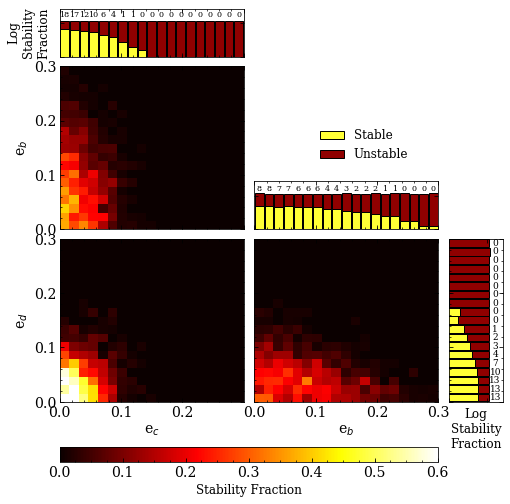

In [11]:
# plot stability maps
fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(7,7)

# stability map vs e_b and e_c
ax1 = plt.subplot(gs[1:4,:3])
vmin, vmax = 0, .6
ax1.pcolormesh(eccbins, eccbins, stabfrac_bc, cmap=plt.get_cmap('hot'), vmin=vmin, vmax=vmax)
ax1.set_xlim((0,.3))
ax1.set_ylabel('e$_b$', fontsize=14)
ax1.set_xticklabels('')

# stability map vs e_b and e_d
ax2 = plt.subplot(gs[4:7,3:6])
ax2.pcolormesh(eccbins, eccbins, stabfrac_bd.T, cmap=plt.get_cmap('hot'), vmin=vmin, vmax=vmax)
ax2.set_yticklabels('')
ax2.set_xlabel('e$_b$', fontsize=14)

# stability map vs e_d and e_c
ax6 = plt.subplot(gs[4:,:3])
img = ax6.pcolormesh(eccbins, eccbins, stabfrac_cd.T, cmap=plt.get_cmap('hot'), vmin=vmin, vmax=vmax)
#ax6.set_yticklabels('')
ax6.set_xlabel('e$_c$', fontsize=14), ax6.set_ylabel('e$_d$', fontsize=14)
ax6.set_xticks(np.arange(0,.3,.1)), ax6.set_xticklabels(np.arange(0,.3,.1))

# stability colorbar
cbar_axes = fig.add_axes([.1, .08, .75, .03])
cbar = plt.colorbar(img, cax=cbar_axes, orientation='horizontal')
cbar.set_label('Stability Fraction', fontsize=12)

# stability fraction: e_c
ax3 = plt.subplot(gs[0,:3])
cols = [rgb2hex(plt.get_cmap('hot')(int(f*255))[:3]) for f in [.8,.2]]
p=ax3.hist([self.ecc0[:,1][self.stable], self.ecc0[:,1][np.invert(self.stable)]], bins=eccbins, stacked=True, 
           color=cols, rwidth=.9, linewidth=1, edgecolor='k', log=True)
Nstable, Ntotal, xbins = p[0][0], p[0][1], p[1]
xbins = xbins[:-1] + np.diff(xbins)[0]/2
frac_stable = np.round(Nstable*1e2 / Ntotal)
for i in range(xbins.size):
    ax3.text(xbins[i], Ntotal[i]+1e3, '%i'%frac_stable[i], fontsize=8,
             horizontalalignment='center', verticalalignment='bottom')
ax3.set_xlim((0,.3))
ax3.set_yticklabels(''), ax3.set_xticklabels('')
ax3.set_ylabel('Log\nStability\nFraction', fontsize=12, labelpad=6)
ax3.set_ylim((1,2e4))

# stability fraction: e_d
ax4 = plt.subplot(gs[4:,-1])
p=ax4.hist([self.ecc0[:,2][self.stable], self.ecc0[:,2][np.invert(self.stable)]], bins=eccbins, stacked=True, 
           color=cols, rwidth=.9, linewidth=1, edgecolor='k', log=True, orientation='horizontal')
Nstable, Ntotal, xbins = p[0][0], p[0][1], p[1]
xbins = xbins[:-1] + np.diff(xbins)[0]/2
frac_stable = np.round(Nstable*1e2 / Ntotal)
for i in range(xbins.size):
    ax4.text(Ntotal[i]+3e3, xbins[i], '%i'%frac_stable[i], fontsize=9,
             horizontalalignment='center', verticalalignment='center')
       
ax4.set_ylim((0,.3))
ax4.set_yticklabels(''), ax4.set_xticklabels('')
ax4.set_xlabel('Log\nStability\nFraction', fontsize=12, labelpad=2)
ax4.set_xlim((1,2e4))

# stability fraction: e_b
ax5 = plt.subplot(gs[3,3:6])
p=ax5.hist([self.ecc0[:,0][self.stable], self.ecc0[:,0][np.invert(self.stable)]], bins=eccbins, stacked=True, 
           color=cols, rwidth=.9, linewidth=1, edgecolor='k', log=True, label=['Stable','Unstable'])
Nstable, Ntotal, xbins = p[0][0], p[0][1], p[1]
xbins = xbins[:-1] + np.diff(xbins)[0]/2
frac_stable = np.round(Nstable*1e2 / Ntotal)
for i in range(xbins.size):
    ax5.text(xbins[i], Ntotal[i]+3e3, '%i'%frac_stable[i], fontsize=8,
             horizontalalignment='center', verticalalignment='center')

ax5.set_xlim((0,.3))
ax5.set_yticklabels(''), ax5.set_xticklabels('')
ax5.legend(bbox_to_anchor=(.3,1.2), fontsize=12, frameon=False)
#ax5.set_xlabel('Log\nStability\nFraction', fontsize=12, labelpad=4)
ax5.set_ylim((1,2e4))

fig.subplots_adjust(bottom=.2, top=.98, right=.98, left=.1)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/stabilityv2.png')